In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


In [38]:
data = pd.DataFrame(pd.read_csv("african_crises.csv"))

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# Make a copy of the original data
data_copy = data.copy()

# Divide the data into “attributes” X and “labels” Y
X = data_copy[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
               'sovereign_external_debt_default', 'gdp_weighted_default',
               'inflation_annual_cpi', 'independence', 'currency_crises',
               'inflation_crises']]
Y = data_copy['banking_crisis']

## percentage of crisis & no crisis
count_no_crisis = len(data_copy[Y == 'no_crisis'])
count_crisis = len(data_copy[Y == 'crisis'])
pct_of_no_crisis = count_no_crisis / (count_no_crisis + count_crisis)
print("percentage of no crisis is", pct_of_no_crisis * 100)
pct_of_crisis = count_crisis / (count_no_crisis + count_crisis)
print("percentage of crisis", pct_of_crisis * 100)

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


In [40]:
# Convert Y to one-hot encoding
Y = pd.get_dummies(Y)
Y = Y.drop(['no_crisis'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9779874213836478
Confusion Matrix:
[[282   3]
 [  4  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       285
           1       0.91      0.88      0.89        33

    accuracy                           0.98       318
   macro avg       0.95      0.93      0.94       318
weighted avg       0.98      0.98      0.98       318



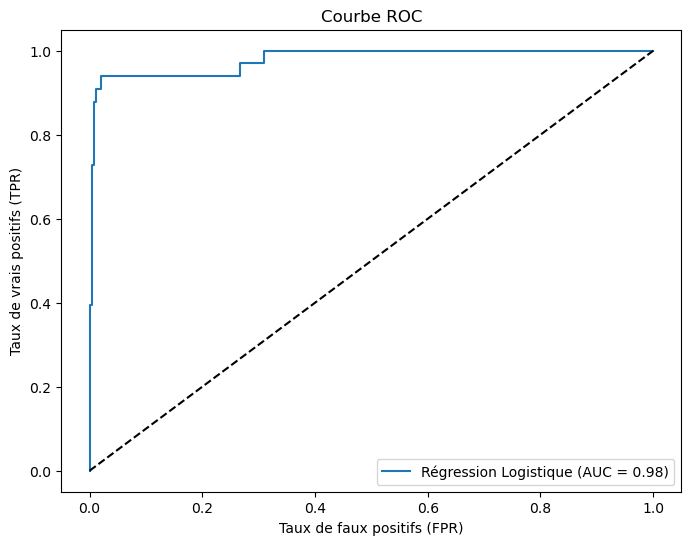

systemic_crisis: 5.168795713943351
exch_usd: 0.0017792880531119128
domestic_debt_in_default: 0.022700161125127776
sovereign_external_debt_default: -0.18309542283848926
gdp_weighted_default: 0.22720544964262046
inflation_annual_cpi: 0.007975049854041148
independence: 1.0574899649856109
currency_crises: -0.014481794942596594
inflation_crises: 0.7824443153616724


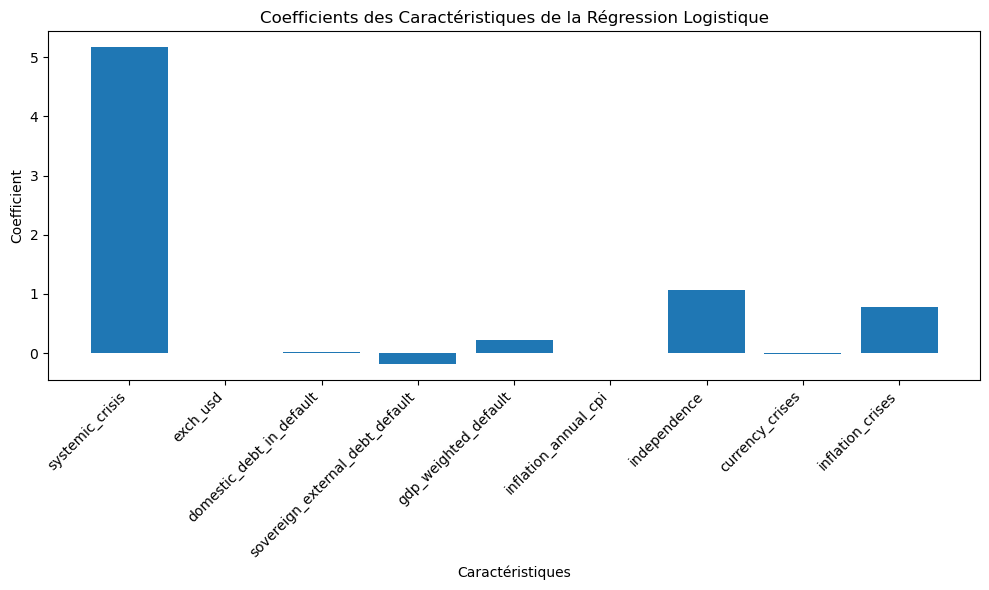

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report)

Y_probs = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Régression Logistique (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


feature_names = X_train.columns
coefficients = logreg.coef_

for feature, coefficient in zip(feature_names, coefficients[0]):
    print(f"{feature}: {coefficient}")
    
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients[0])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Caractéristiques')
plt.ylabel('Coefficient')
plt.title('Coefficients des Caractéristiques de la Régression Logistique')
plt.tight_layout()
plt.show()

Accuracy: 0.9150943396226415
Confusion Matrix:
[[282   3]
 [ 24   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       285
           1       0.75      0.27      0.40        33

    accuracy                           0.92       318
   macro avg       0.84      0.63      0.68       318
weighted avg       0.90      0.92      0.90       318



C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


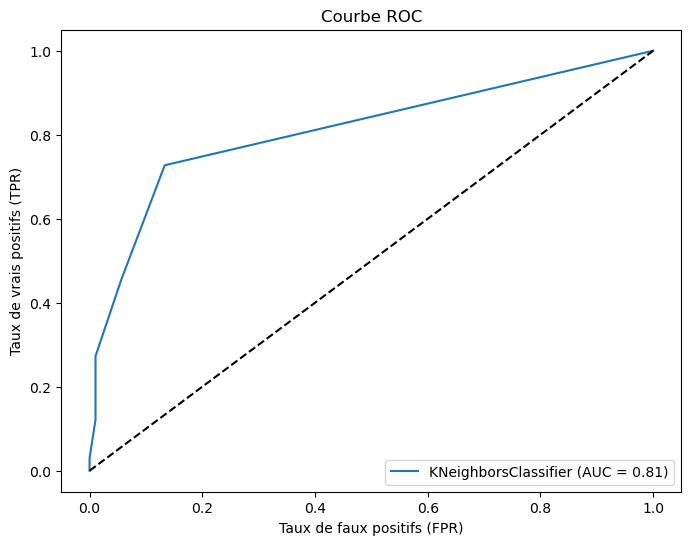

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit the KNN model to the training data
knn.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report)

Y_probs = knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNeighborsClassifier (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HASRI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin

Accuracy: 0.8962264150943396
Confusion Matrix:
[[285   0]
 [ 33   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       285
           1       0.00      0.00      0.00        33

    accuracy                           0.90       318
   macro avg       0.45      0.50      0.47       318
weighted avg       0.80      0.90      0.85       318



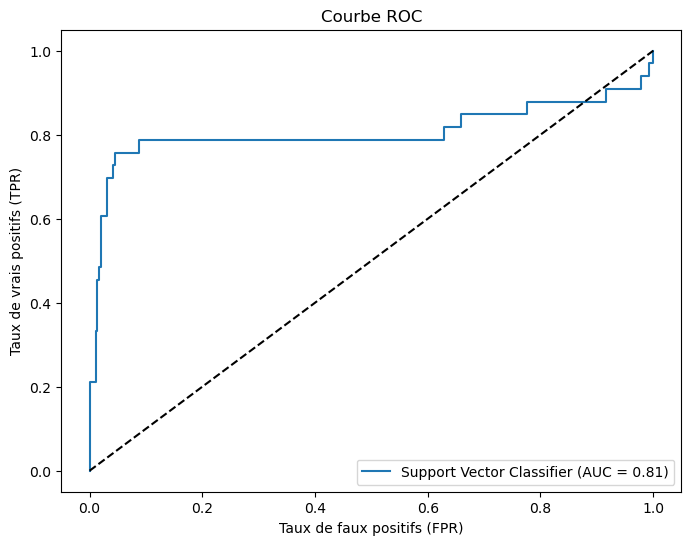

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Create an instance of SVC (Support Vector Classifier)
svm = SVC(probability=True)

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(class_report)

Y_probs = svm.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_probs)

roc_auc = roc_auc_score(Y_test, Y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Support Vector Classifier (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()
